<a href="https://colab.research.google.com/github/sanglee/BDS_WS/blob/main/lecture02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Biomedical Data Science Winter School

@author: Sangkyun Lee  (sangkyun@korea.ac.kr)

___ML II: K-NN & Decision Tree___

---

In [ ]:
# A utility function to plot decision boundaries in 2D

from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)]*sum(y == cl),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

---
### Loading the IRIS data

In [ ]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', names= ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Label'])

In [ ]:
# Prepare data matrix and labels

import numpy as np

y = df.iloc[:, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[:, [0, 2]].values

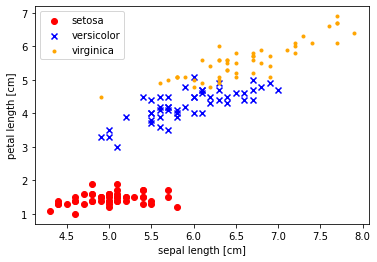

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.scatter(X[100:150, 0], X[100:150, 1],
            color='orange', marker='.', label='virginica')


plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

## Train/Validation/Test Split of Data

In [ ]:
from sklearn.model_selection import train_test_split

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Split into train & validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

- When the sample size is small, this type of split can make each split too small
- Use cross validation instead (to be discussed later)

---
## Supervised Learning / Classification
### K-nearest neighbor (K-NN) Algorithm

- One of the simplest learning algorithm
- A **lazy learner**: KNN doesn't learn a discriminative function from the training data
- An **instance-based learning** algorithm: learning is performed by memorizing the training dataset

### K-NN
- Choose the number $k$ of neighbors
- Choose the distance metric
- Find the $k$ nearest neighbors of the sample we want to classify
- Assign the class label by majority voting

<img src="https://raw.githubusercontent.com/sanglee/BDS_WS/master/img/03_20.png" width=400>

#### Pros:
- The classifier immediately adapts as we collect new training data

#### Cons:
- Computational complexity grows linearly with the number of samples in the training data in the worst-case
- Susceptible for overfitting, especially when the input dimension is high (**curse of dimensionality** : for a fixed-size training set, the feature space becomes increasingly sparse as the dimension increases.)

#### Metrics

- Minkowski distance ($\ell_p$-norm)
$$
  d(x^{(i)}, x^{(j)}) = \left( \sum_k \left|x^{(i)}_k - x^{(j)}_k \right|^p \right)^{1/p}
$$
  - $p=2$ : Euclidean distance
  - $p=1$ : Manhattan distance ($\ell_1$-norm)

### Preprocessing: feature scaling
$$
  z = \frac{x-\mu}{\sigma}
$$

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train) # fit on the training set: mu (mean) and sigma (std) are computed
X_train_std = sc.transform(X_train)
X_val_std = sc.transform(X_val)
X_test_std = sc.transform(X_test)

### Train a K-NN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2,    # no. of neighbors
                           p=2,               # p in Minkowski distance
                           metric='minkowski'
                          )
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=2)

For other metrics can be used, see [link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric)

### Plot the decision boundary of K-NN

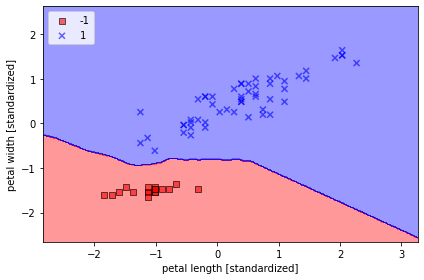

In [ ]:
plot_decision_regions(X_train_std, y_train, classifier=knn)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Report Prediction Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_train_std)
print('Training Accuracy: %.2f' % accuracy_score(y_train, y_pred))
y_pred = knn.predict(X_test_std)
print('Test Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Training Accuracy: 1.00
Test Accuracy: 1.00


Q. Anything wrong?

---

## Decision Tree

A machine learning model that breaks down the data with a series of questions

In particular, we ask questions *most* helpful for dividing different classes
- e.g. "sepal width $\ge$ 2.8cm?" 
   - Yes ==> Class 1
   - No ==> Class 2

Need to find the feature **most** helpful for dividing the data

Unlike other ML methods, **DT does not require feature scaling**!

### Training a Decision Tree: Binary Classification of IRIS

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', # to be discussed later
                              max_depth=2,         
                              random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

### Visualize the Decision Tree Classifier

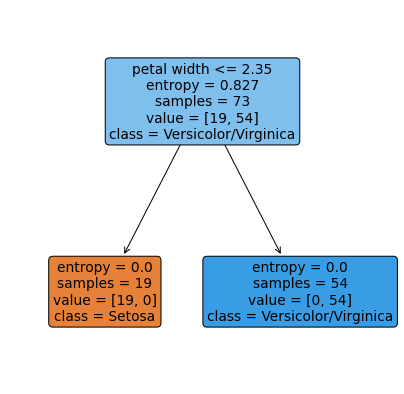

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(7,7))
plot_tree(tree, filled=True, 
                rounded=True,
                class_names=['Setosa', 
                             'Versicolor/Virginica'],
                feature_names=['petal length', 
                               'petal width'])
plt.show()

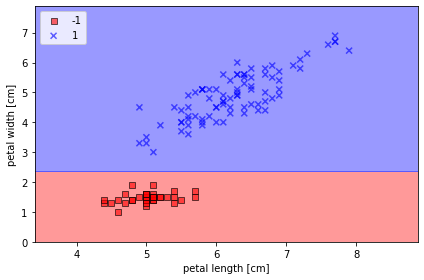

In [ ]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Decision Tree: Multi-Class Classification of IRIS

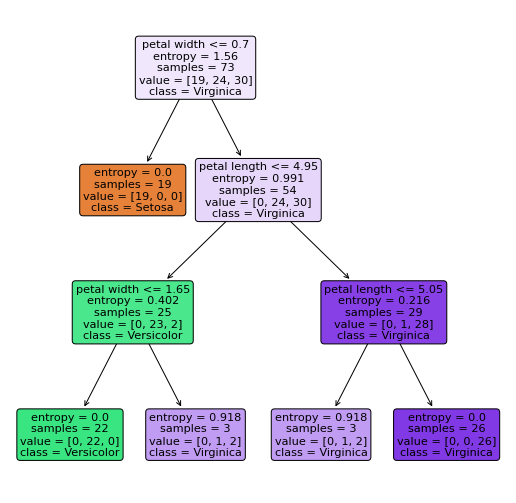

In [ ]:
y = df.iloc[:, 4].values
y, _ = pd.factorize(y)
#y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[:, [2, 3]].values

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

# Train
tree = DecisionTreeClassifier(criterion='entropy', # to be discussed later
                              max_depth=3,         # to be discussed later
                              random_state=0)
tree.fit(X_train, y_train)

# Visualize
plt.figure(figsize=(9,9))
plot_tree(tree, filled=True, 
                rounded=True,
                class_names=['Setosa', 
                             'Versicolor',
                             'Virginica'],
                feature_names=['petal length', 
                               'petal width'])
plt.show()

### Plot the decision bourday of DT

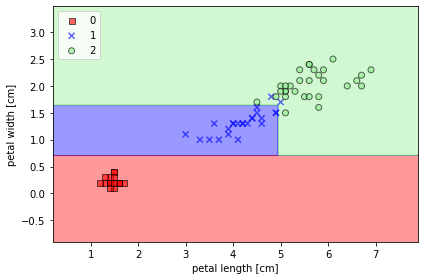

In [ ]:
plot_decision_regions(X_train, y_train, classifier=tree)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## How to Find the Most Informative Questions?

### Information Gain

Reduction of impurity by splitting the data by a question $f$.

$$
   IG(D_p, f) = I(D_p) - \frac{N_{\text{left}}}{N_p} I(D_{\text{left}}) - \frac{N_{\text{right}}}{N_p} I(D_{\text{right}})
$$

- $f$: the question to be used for splitting
- $D_p$: the data at the parent node
- $D_{\text{left}}$, $D_{\text{right}}$: the data at the left and right child nodes
- $I$: impurity measure
- $N_p$: no. samples at the paraent node
- $N_{\text{left}}$, $N_{\text{right}}: no. samples at the $j$th child node

The lower the impurity at the child nodes, the larger the information gain.

### Impurity Measures

#### Shannon Entropy
$$
  I_H(t) = - \sum_{i=1}^c p(i|t) \log_2 p(i|t)
$$

   - $p(i|t)$: the proportion of the samples that belong to the class $i$ at the node $t$
   - Entropy is 0 (min value) if $p(i=1|t)=1$ or $p(i=0|t)=0$.
   - Entropy is 1 (max value) if $p(i=1|t)=0.5$ and $p(i=0|t)=0.5$ (uniform distribution)
   
#### Gini Index
$$
   I_G(t) = \sum_{i=1}^c p(i|t)[ 1 - p(i|t) ] = 1 - \sum_{i=1}^c p(i|t)^2
$$
     - Gini index is 0 (min value) if $p(i=1|t)=1$ or $p(i=0|t)=0$
     - Gini index is 0.5 (max value) if $p(i=1|t)=0.5$ and $p(i=0|t)=0.5$
     - In practice, Gini index and entropy produces very similar results in decision trees

#### Classification error
$$
  I_E(t) = 1 - \max_{i \in \{1,\dots,c\}}\{ p(i|t) \}
$$

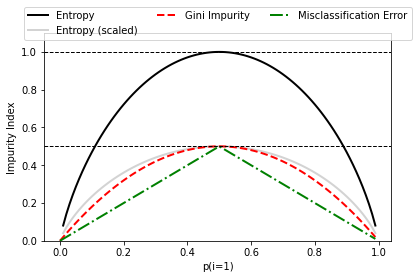

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.tight_layout()
plt.show()

### Information Gain Computation Example
<img src="https://raw.githubusercontent.com/sanglee/BDS_WS/master/img/03_22.png" width=600>

$$
I_G(D_p) = 1 - (0.5^2 + 0.5^2) = 0.5
$$

A:
\begin{alignat}{2}
I_G(D_\text{left}) = 1 - (\frac34^2 + \frac14^2) &= 0.375 \qquad
I_G(D_\text{right}) = 1 - (\frac14^2 + \frac34^2) = 0.375\\
IG_G &= 0.5 - \frac48 0.375 - \frac48 0.375 = 0.125
\end{alignat}

B:
\begin{alignat}{2}
I_G(D_\text{left}) = 1 - (\frac26^2 + \frac46^2) &= \frac49 \qquad
I_G(D_\text{right}) = 1 - (1^2 + 0^2) = 0\\\\
IG_G &= 0.5 - \frac68 \frac49 - \frac28 0 = 0.167
\end{alignat}

## Summary

__Supervised Learning: Classification__


__K-NN__
- A instance-based learning algorithm
- K (the number of neighbors) is a hyperparameter
- Susceptible to overfitting in high dimensions
- Feature scaling is necessary

__Decision Tree__
- Builds a tree of splitting the training data into parts, improving class purity
- Tree depth is a hyperparameter
- Pros:
  - No need for feature scaling
  - DT gives a human-understandable rule for decision
- Cons:
  - Decision boundary is axis-aligned